# Identify Overfitting in Deep Learning ( EARLY STOPPING and REGULARISATION)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.drop(columns=['RowNumber','CustomerId','Surname','Geography','Gender'],inplace=True)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [3]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [4]:
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [5]:
x.shape

(10000, 8)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [7]:
x_train.shape

(8000, 8)

In [8]:
import tensorflow

In [9]:
from keras.layers import Dense
from keras.models import Sequential

In [10]:
sq = Sequential()

In [11]:
from keras.regularizers import L2
from keras.layers import BatchNormalization

In [12]:
#Using Regularizer 
sq.add(Dense(6,input_dim=8,activation='relu',kernel_regularizer=L2(l2=0.01)))
sq.add(BatchNormalization()) #we can us Batch Normalization upto 2nd last step
sq.add(Dense(4,activation='relu'))  #we can us Kernel Regularizer upto2nd last step
sq.add(BatchNormalization())
sq.add(Dense(2,activation='relu'))
sq.add(Dense(1,activation='sigmoid'))

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
sq.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
from keras.callbacks import EarlyStopping

In [15]:
#Using EarlyStopping - It will stop Sequential whenever it feels like accuracy will decreased from this epochs.

sq.fit(x_train,y_train,batch_size=100,epochs=40,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7981 - loss: 0.6483 - val_accuracy: 0.7890 - val_loss: 0.6153
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.5714 - val_accuracy: 0.7890 - val_loss: 0.5527
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.5299 - val_accuracy: 0.7890 - val_loss: 0.5233
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8066 - loss: 0.4996 - val_accuracy: 0.7890 - val_loss: 0.5083
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.4873 - val_accuracy: 0.7890 - val_loss: 0.4964
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.4977 - val_accuracy: 0.7890 - val_loss: 0.4844
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7966 - loss: 0.4722 - val_accuracy: 0.7890 - val_loss: 0.4729
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7966 - loss: 0.4541 - val_accuracy: 0.7890 - val_loss:

In [16]:
import matplotlib.pyplot as plt

In [17]:
train_accuracy=sq.history.history["accuracy"]
test_accuracy=sq.history.history["val_accuracy"]

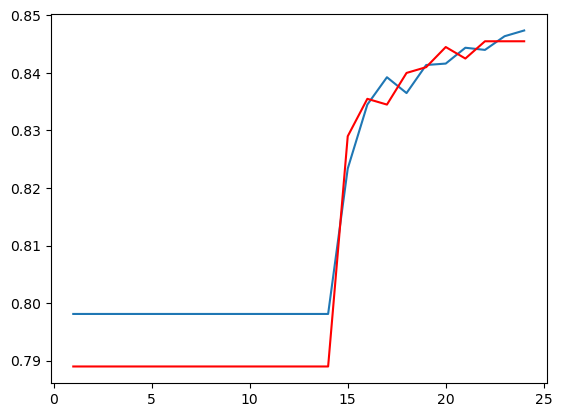

In [19]:
plt.plot([i for i in range(1,25)],train_accuracy)
plt.plot([i for i in range(1,25)],test_accuracy,c='red')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
prd = sq.predict(x_test)
prd_data = []
for i in prd:
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [22]:
prd1 = sq.predict(x_train)
prd_data1 = []
for i in prd1:
    if i[0]>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step


In [23]:
accuracy_score(y_test,prd_data)*100

84.55

In [24]:
accuracy_score(y_train,prd_data1)*100

84.925